In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Učitavanje originalnog dataset-a
data = pd.read_csv('dataset/Pulsar_cleaned.csv')

# Deljenje podataka na atribute i ciljne promenljive
X = data.drop('Class', axis=1)
y = data['Class']

# Podela originalnog skupa podataka na trening (80%) i test (20%) skup
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicijalizacija modela
model = DecisionTreeClassifier()

# Treniranje modela na originalnom skupu podataka
model.fit(X_train_original, y_train_original)

# Predviđanje na trening skupu originalnih podataka
y_train_original_pred = model.predict(X_train_original)

# Predviđanje na test skupu originalnih podataka
y_test_original_pred = model.predict(X_test_original)

# Izračunavanje metrika za trening skup originalnih podataka
train_accuracy_original = accuracy_score(y_train_original, y_train_original_pred)
train_recall_original = recall_score(y_train_original, y_train_original_pred)
train_precision_original = precision_score(y_train_original, y_train_original_pred)
train_f1_original = f1_score(y_train_original, y_train_original_pred)

# Izračunavanje metrika za test skup originalnih podataka
test_accuracy_original = accuracy_score(y_test_original, y_test_original_pred)
test_recall_original = recall_score(y_test_original, y_test_original_pred)
test_precision_original = precision_score(y_test_original, y_test_original_pred)
test_f1_original = f1_score(y_test_original, y_test_original_pred)

# Učitavanje kombinovanog dataset-a (originalni + sintetički podaci)
combined_data = pd.read_csv('dataset/combined_data2.csv')

# Deljenje podataka na atribute i ciljne promenljive
X_combined = combined_data.drop('Class', axis=1)
y_combined = combined_data['Class']

# Ručno podeliti kombinovani dataset na test (prvih 20%) i trening (poslednjih 80%) skup
test_size = int(0.2 * len(combined_data))
X_test_combined = X_combined[:test_size]
y_test_combined = y_combined[:test_size]
X_train_combined = X_combined[test_size:]
y_train_combined = y_combined[test_size:]

# Treniranje modela na kombinovanom skupu podataka
model.fit(X_train_combined, y_train_combined)

# Predviđanje na trening skupu kombinovanih podataka
y_train_combined_pred = model.predict(X_train_combined)

# Predviđanje na test skupu kombinovanih podataka
y_test_combined_pred = model.predict(X_test_combined)

# Izračunavanje metrika za trening skup kombinovanih podataka
train_accuracy_combined = accuracy_score(y_train_combined, y_train_combined_pred)
train_recall_combined = recall_score(y_train_combined, y_train_combined_pred)
train_precision_combined = precision_score(y_train_combined, y_train_combined_pred)
train_f1_combined = f1_score(y_train_combined, y_train_combined_pred)

# Izračunavanje metrika za test skup kombinovanih podataka
test_accuracy_combined = accuracy_score(y_test_combined, y_test_combined_pred)
test_recall_combined = recall_score(y_test_combined, y_test_combined_pred)
test_precision_combined = precision_score(y_test_combined, y_test_combined_pred)
test_f1_combined = f1_score(y_test_combined, y_test_combined_pred)

# Prikaz metrika za originalni dataset
results_original = pd.DataFrame({
    'Skup podataka': ['Trening', 'Test'],
    'Tačnost': [train_accuracy_original, test_accuracy_original],
    'Odziv': [train_recall_original, test_recall_original],
    'Preciznost': [train_precision_original, test_precision_original],
    'F-mera': [train_f1_original, test_f1_original]
})

print("Rezultati na originalnom datasetu:")
print(results_original)

# Prikaz metrika za kombinovani dataset
results_combined = pd.DataFrame({
    'Skup podataka': ['Trening', 'Test'],
    'Tačnost': [train_accuracy_combined, test_accuracy_combined],
    'Odziv': [train_recall_combined, test_recall_combined],
    'Preciznost': [train_precision_combined, test_precision_combined],
    'F-mera': [train_f1_combined, test_f1_combined]
})

print("Rezultati na kombinovanom datasetu:")
print(results_combined)


Rezultati na originalnom datasetu:
  Skup podataka   Tačnost    Odziv  Preciznost    F-mera
0       Trening  1.000000  1.00000    1.000000  1.000000
1          Test  0.975317  0.42029    0.460317  0.439394
Rezultati na kombinovanom datasetu:
  Skup podataka   Tačnost     Odziv  Preciznost    F-mera
0       Trening  1.000000  1.000000    1.000000  1.000000
1          Test  0.921961  0.550725    0.233129  0.327586


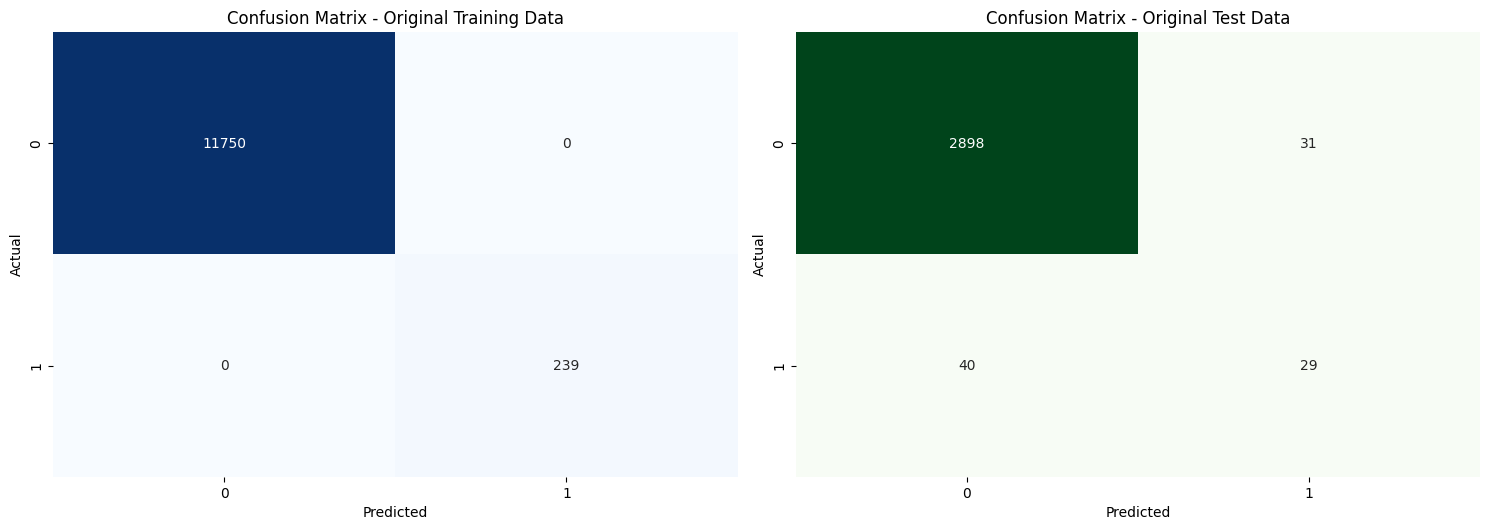

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrices for the original dataset
cm_train_original = confusion_matrix(y_train_original, y_train_original_pred)
cm_test_original = confusion_matrix(y_test_original, y_test_original_pred)

# Plot confusion matrices for the original dataset
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.heatmap(cm_train_original, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Original Training Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(2, 2, 2)
sns.heatmap(cm_test_original, annot=True, fmt='g', cmap='Greens', cbar=False)
plt.title('Confusion Matrix - Original Test Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


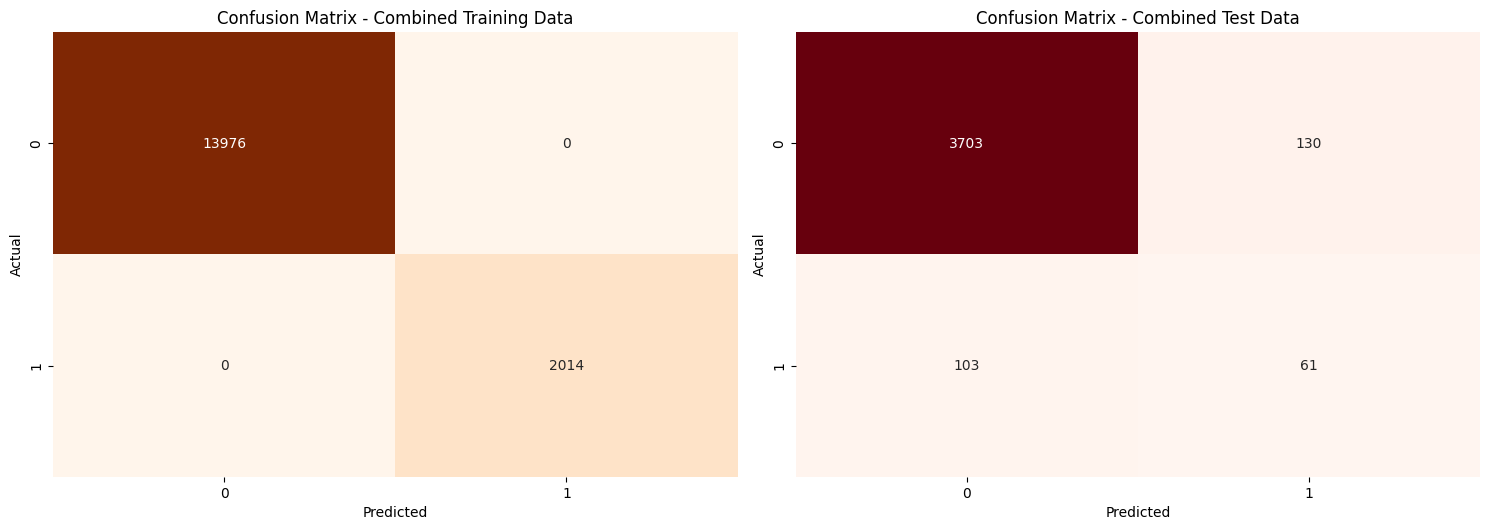

In [16]:
# Calculate confusion matrices for the combined dataset
cm_train_combined = confusion_matrix(y_train_combined, y_train_combined_pred)
cm_test_combined = confusion_matrix(y_test_combined, y_test_combined_pred)

# Plot confusion matrices for the combined dataset
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.heatmap(cm_train_combined, annot=True, fmt='g', cmap='Oranges', cbar=False)
plt.title('Confusion Matrix - Combined Training Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(2, 2, 2)
sns.heatmap(cm_test_combined, annot=True, fmt='g', cmap='Reds', cbar=False)
plt.title('Confusion Matrix - Combined Test Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


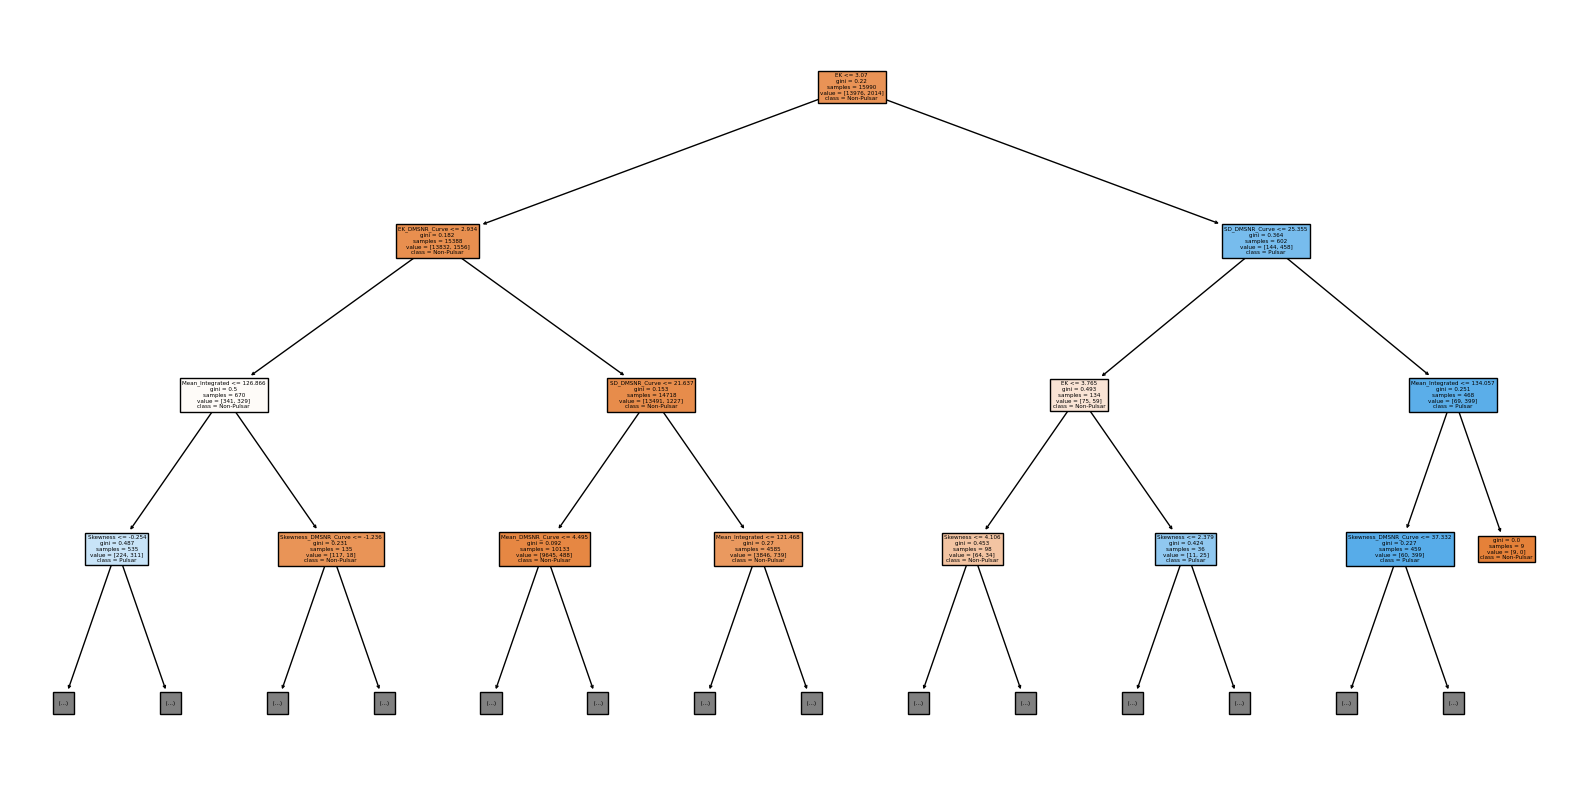

In [13]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# crtanje stabla odlucivanja
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X_train.columns, class_names=['Non-Pulsar', 'Pulsar'], max_depth=3)  # Postavite željenu maksimalnu dubinu stabla
plt.show()


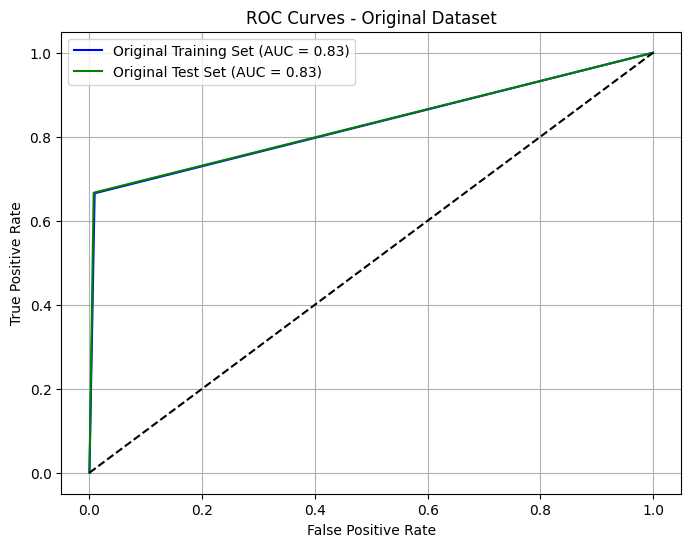

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate predicted probabilities for original dataset
y_train_probs_original = model.predict_proba(X_train_original)[:, 1]
y_test_probs_original = model.predict_proba(X_test_original)[:, 1]

# Calculate ROC curve values for original dataset
train_fpr_original, train_tpr_original, _ = roc_curve(y_train_original, y_train_probs_original)
test_fpr_original, test_tpr_original, _ = roc_curve(y_test_original, y_test_probs_original)

# Calculate AUC values for original dataset
train_auc_original = auc(train_fpr_original, train_tpr_original)
test_auc_original = auc(test_fpr_original, test_tpr_original)

# Plot ROC curves for original dataset
plt.figure(figsize=(8, 6))

plt.plot(train_fpr_original, train_tpr_original, label='Original Training Set (AUC = {:.2f})'.format(train_auc_original), color='blue')
plt.plot(test_fpr_original, test_tpr_original, label='Original Test Set (AUC = {:.2f})'.format(test_auc_original), color='green')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Original Dataset')
plt.legend()
plt.grid(True)

plt.show()


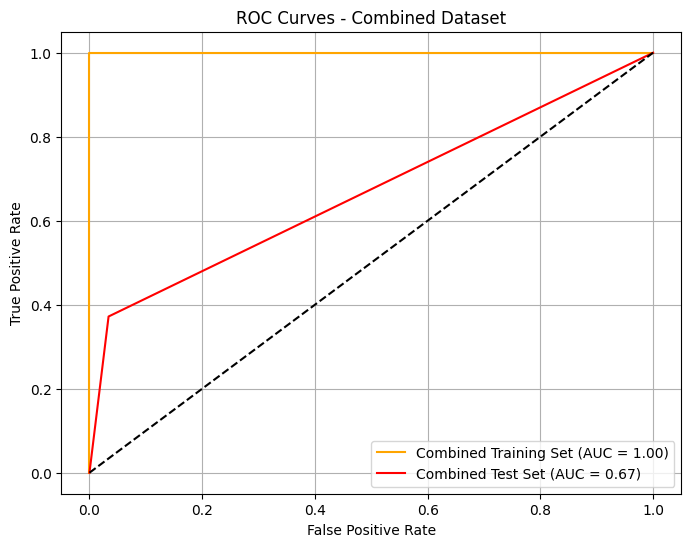

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate predicted probabilities for combined dataset
y_train_probs_combined = model.predict_proba(X_train_combined)[:, 1]
y_test_probs_combined = model.predict_proba(X_test_combined)[:, 1]

# Calculate ROC curve values for combined dataset
train_fpr_combined, train_tpr_combined, _ = roc_curve(y_train_combined, y_train_probs_combined)
test_fpr_combined, test_tpr_combined, _ = roc_curve(y_test_combined, y_test_probs_combined)

# Calculate AUC values for combined dataset
train_auc_combined = auc(train_fpr_combined, train_tpr_combined)
test_auc_combined = auc(test_fpr_combined, test_tpr_combined)

# Plot ROC curves for combined dataset
plt.figure(figsize=(8, 6))

plt.plot(train_fpr_combined, train_tpr_combined, label='Combined Training Set (AUC = {:.2f})'.format(train_auc_combined), color='orange')
plt.plot(test_fpr_combined, test_tpr_combined, label='Combined Test Set (AUC = {:.2f})'.format(test_auc_combined), color='red')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Combined Dataset')
plt.legend()
plt.grid(True)

plt.show()
